Being a self-proclaimed movie buff, I decided to use this IMDB dataset concerned with reviews scraped from IMDB. Amongst the myriad of movie datasets I could have chosen, I chose this one because it was on the front page for when filtering all datasets for the most liked. The description on huggingface read: 

Large Movie Review Dataset. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.

In more layman terms, this dataset contains labelled reviews alongside their sentiment - with 0 indicating negative, 1 indicating positive. Sentiment in this context just means how the reviewer felt about the movie. Unfortunately, we don't have any other information regarding the stars of the film, budget, gross revenue or movie rating. That being said let's check out what we can regarding this data anyways.

Now without further adieu, let's explore! Let's first check that we have the right libraries.

In [128]:
!pip3 install pandas
!pip3 install datasets

Knowing that pandas and datasets are available to our environment, let's start exploring the data. First, we need to download the data. Let's do that using the datasets package.



In [129]:
from datasets import load_dataset
# Type of data provided on huggingface: https://huggingface.co/datasets/imdb
dataset = load_dataset("imdb")

Reusing dataset imdb (C:\Users\PC\.cache\huggingface\datasets\imdb\plain_text\1.0.0\2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
100%|██████████| 3/3 [00:00<00:00, 130.28it/s]


Datasets provides the data ina specific format. Let's take a peak at this beauty:

In [130]:
print(type(dataset))
print(dataset)

<class 'datasets.dataset_dict.DatasetDict'>
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


A DatasetDict. Given that the third entry is just the first two with different labels (for unsupervised learning), let's extract only the first two splits.

In [131]:
import pandas as pd
from datasets import concatenate_datasets

df = pd.DataFrame(concatenate_datasets([dataset['train'], dataset['test']]))

Great! Now we can start developing intuition regarding the data. Let's start by getting the...

    - num_rows and num_columns
    - example entries
    - headers
    - number of non-unique entries
    - any null entries

In [132]:
# Determine Shape: (Rows, Columns)
df.shape


(50000, 2)

In [133]:
# Dispaly the first 5 entries
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [134]:
df.columns

Index(['text', 'label'], dtype='object')

In [135]:
# Determine if any values are non-unique
df.nunique(axis=0)

text     49582
label        2
dtype: int64

In [136]:
# Determine if any values are missing
df.isnull().any() 

text     False
label    False
dtype: bool

We can see that there is a modest 50,000 entries and only 2 columns. Furthermore, of those 50,000 it appears there are duplicates - 418 of them, to be exact. Let's check what's going on with these duplicates before potentially removing them from our dataframe. Let's get the indices of the duplicates and use that to extract the entries into another dataframe.

In [137]:
first_dup_in = df[df.duplicated(keep="first")].index
dup_df = df.iloc[first_dup_in, :]
dup_df

,text,label
168,I am not so much like Love Sick as I image. Fi...,0
664,Holy freaking God all-freaking-mighty. This mo...,0
701,"The story and the show were good, but it was r...",0
3070,I watched this movie when Joe Bob Briggs hoste...,0
3591,"I like Chris Rock, but I feel he is wasted in ...",0
...,...,...
49911,I watched Pola X because Scott Walker composed...,1
49912,Leos Carax has made 3 great movies: Boys Meet ...,1
49913,Leos Carax is brilliant and is one of the best...,1
49914,I've tried to reconcile why so many bad review...,1


This unfortunately doesn't tell us too much just from a glance. Let's take a closer look at the actual entries within the field and contrast them with entries that are not duplicated.

In [138]:
dup_series = dup_df['text'].reset_index(drop=True)
dup_series[0]

'I am not so much like Love Sick as I image. Finally the film express sexual relationship of Alex, kik, Sandu their triangle love were full of intenseness, frustration and jealous, at last, Alex waked up and realized that they would not have result and future.Ending up was sad.<br /><br />The director Tudor Giurgiu was in AMC theatre on Sunday 12:00PM on 08/10/06, with us watched the movie together. After the movie he told the audiences that the purposed to create this film which was to express the sexual relationships of Romanian were kind of complicate.<br /><br />On my point of view sexual life is always complicated in everywhere, I don\'t feel any particular impression and effect from the movie. The love proceeding of Alex and Kiki, and Kiki and her brother Sandu were kind of next door neighborhood story.<br /><br />The two main reasons I don\'t like this movie are, firstly, the film didn\'t told us how they started to fall in love? Sounds like after Alex moved into the building wh

In [139]:
dup_series[1]

"Holy freaking God all-freaking-mighty. This movie was so bad, I thought I was on drugs. In a bad way... The character acting is the poorest thing I've seen in quite some time. This movie was more akin to Lord of the G-Strings, IMHO(it's a real movie). Most of the movie appeared to be done on a horrible green screen. My favorite part was when they are in the carriage, and you can tell there's no horse. They're fleeing from alien monsters, and going about the same speed as a swift jog. Then it switches to a far-shot with a ridiculous CG horse. And the CG in general seems to be sub-par to 1992's Beyond the Mind's Eye. I mean, Come on, really. It felt like a horrible episode of Hercules, only without Kevin Sorbo there to save the day. Worst. Movie. Ever."

Now let's 

In [140]:
dup_series[2]

'The story and the show were good, but it was really depressing and I hate depressing movies. Ri\'Chard is great. He really put on a top notch performance, and the girl who played his sister was really awesome and gorgeous. Seriously, I thought she was Carmen Electra until I saw the IMDb profile. I can\'t say anything bad about Peter Galleghar. He\'s one of my favorite actors. I love Anne Rice. I\'m currently reading the Vampire Chronicles, but I\'m glad I saw the movie before reading the book. This is a little too"real" for me. I prefer Lestat and Louis\'s witty little tiffs to the struggles of slaves. Eartha Kitt was so creepy and after her character did what she did The movie was ruined for me; I could barely stand to watch the rest of the show. (sorry for the ambiguity, but I don\'t want to give anything away) Sorry, but it\'s just not my type of show.'

In [141]:
no_dup_df = df[~df.duplicated(keep="first")].reset_index(drop=True)

no_dup_df['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [142]:
no_dup_df['text'][1]

'"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the s

In [143]:
no_dup_df['text'][2]

"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />"

Although we don't see any relationship between duplication status and syntax/vocabulary involved, an interesting thing can be seen in the final review - there are html tags. In other words, we're going to have to clean up some data before processing it. Let's go ahead and use some simple regex to clean each entry up.

In [144]:
import re
CLEANR = re.compile('<.*?>') 

df.replace('<.*?>', '', regex=True, inplace=True)
no_dup_df['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [145]:
no_dup_df['text'][2]

"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />"

Lastly, let's check out the word count on each review to contrast the distribution in review length when the sentiment is negative (i.e. 0) or positive (i.e. 1)

In [146]:
no_dup_df['count'] = no_dup_df['text'].str.len()
no_dup_df

,text,label,count
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,1640
1,"""I Am Curious: Yellow"" is a risible and preten...",0,1294
2,If only to avoid making this type of film in t...,0,528
3,This film was probably inspired by Godard's Ma...,0,706
4,"Oh, brother...after hearing about this ridicul...",0,1814
...,...,...,...
49577,Just got around to seeing Monster Man yesterda...,1,3909
49578,I got this as part of a competition prize. I w...,1,720
49579,I got Monster Man in a box set of three films ...,1,1158
49580,"Five minutes in, i started to feel how naff th...",1,1981


Let's visualize these distributions by binning the counts in a histogram.

(array([1.924e+03, 5.999e+03, 6.210e+03, 3.316e+03, 2.031e+03, 1.430e+03,
        9.870e+02, 7.130e+02, 5.630e+02, 4.380e+02, 3.200e+02, 2.300e+02,
        1.870e+02, 1.420e+02, 1.070e+02, 1.160e+02, 9.800e+01, 4.400e+01,
        8.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([   65.   ,   405.975,   746.95 ,  1087.925,  1428.9  ,  1769.875,
         2110.85 ,  2451.825,  2792.8  ,  3133.775,  3474.75 ,  3815.725,
         4156.7  ,  4497.675,  4838.65 ,  5179.625,  5520.6  ,  5861.575,
         6202.55 ,  6543.525,  6884.5  ,  7225.475,  7566.45 ,  7907.425,
         8248.4  ,  8589.375,  8930.35 ,  9271.325,  9612.3  ,  9953.275,
        10294.25 , 10635.225, 10976.2  , 11317.175, 11658.15 , 11999.125,
        12340.1  , 12681.075, 13022.05 , 13363.025, 13704.

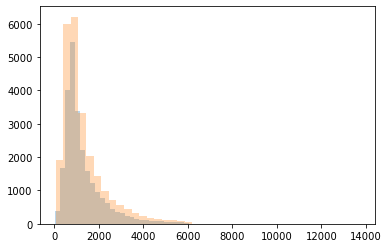

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
neg_df = no_dup_df[no_dup_df['label'] == 0]['count']
pos_df = no_dup_df[no_dup_df['label'] == 1]['count']

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(neg_df, **kwargs)
plt.hist(pos_df, **kwargs)

There isn't any large differences in the document size for each class. Furthermore, the skew towards the right makes sense intuitively as most individuals will review a movie with a reasonable amount of words to comprehensively capture their sentiment, however, there are individuals, including me when talking about e.g. Attack on Titan or the Boys, who may be extremely passionate when concerned with pop culture media.